In [1]:
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import pickle
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Flatten

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import pickle
import tensorflow as tf



def calculate_and_log_training_time(modelname, start_time, end_time):
    training_duration = end_time - start_time
    # Print training duration in a human-readable format
    hours, rem = divmod(training_duration, 3600)
    minutes, seconds = divmod(rem, 60)
    
    filepath = modelname+"trainingtime.txt"
    with open(filepath, "w") as f:
        f.write(f"Training took {int(hours):02d}:{int(minutes):02d}:{seconds:02f} (hh:mm:ss).")



## runtime
def save_model_config_with_optimizer(model, modelname):
    filepath = modelname+"model_config.txt"
    with open(filepath, 'w') as f:
        # Save layer configurations
        for layer in model.layers:
            f.write(f"Layer: {layer.name}\n")
            f.write(f"Config: {layer.get_config()}\n\n")
        
        # Save optimizer configuration
        optimizer_config = model.optimizer.get_config()
        f.write("Optimizer Config:\n")
        f.write(str(optimizer_config))


def save_model(model, modelname):
    model.save(modelname+".keras")

def save_performance_metrics(history, modelname):
    filepath = modelname+'performance_metrics.csv'
    pd.DataFrame(history.history).to_csv(filepath)
    
    
        
def plot_loss_and_metric(history, metric_name='accuracy', model_name='model'):
    """
    Plots the training and validation loss, and a performance metric from the training history, and saves the plots
    with the model name as a prefix. This version explicitly uses Figures and Axes for better control.

    Parameters:
    - history: Return value from model.fit().
    - metric_name: Name of the performance metric to plot (e.g., 'accuracy', 'mae').
    - model_name: Name of the model, used as a prefix for saving plot images.
    """

    # First plot: Training & validation loss values
    fig, ax = plt.subplots(figsize=(14, 6))  # Explicitly create a Figure and Axes
    ax.plot(history.history['loss'], label='Train Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title('Model Loss')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper right')
    ax.grid(True)  # Adding grid explicitly
    loss_plot_filename = f'{model_name}_loss_plot.jpg'
    fig.savefig(loss_plot_filename)
    print(f"Loss plot saved as: {loss_plot_filename}")
    plt.close(fig)  # Close the figure

    # Second plot: Training & validation performance metric
    fig, ax = plt.subplots(figsize=(14, 6))  # Again, explicitly create a Figure and Axes for the metric plot
    ax.plot(history.history[metric_name], label=f'Train {metric_name.capitalize()}')
    ax.plot(history.history[f'val_{metric_name}'], label=f'Validation {metric_name.capitalize()}')
    ax.set_title(f'Model {metric_name.capitalize()}')
    ax.set_ylabel(metric_name.capitalize())
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper left')
    ax.grid(True)  # Adding grid explicitly
    metric_plot_filename = f'{model_name}_{metric_name}_plot.jpg'
    fig.savefig(metric_plot_filename)
    print(f"Metric plot saved as: {metric_plot_filename}")
    plt.close(fig)  # Close the figure to free up memory


def save_model_and_config_and_metrics(model, history, modelname = "model"):
    save_model_config_with_optimizer(model, modelname = modelname)
    save_model(model, modelname = modelname)
    save_performance_metrics(history, modelname = modelname)
    plot_loss_and_metric(history, metric_name='mae', model_name='model')
    

## Greyscale

In [3]:
path = r"C:\Users\busjo\Documents\JADS\Semester 2\Deep Learning\Project\Part1_Processed_Grey.pkl"
# Open the pickle file in binary mode
with open(path, 'rb') as file:
    # Load the content of the file into a variable
    grey_data = pickle.load(file)

In [4]:
sampled_grey_data = grey_data.sample(n=1500)

In [5]:
list(sampled_grey_data['Image'])

[array([[0.07058824, 0.07058824, 0.07058824, ..., 0.42352942, 0.44313726,
         0.44313726],
        [0.07058824, 0.07058824, 0.07058824, ..., 0.42352942, 0.4392157 ,
         0.44313726],
        [0.06666667, 0.07058824, 0.07058824, ..., 0.42745098, 0.44313726,
         0.44705883],
        ...,
        [0.0627451 , 0.0627451 , 0.0627451 , ..., 0.76862746, 0.7764706 ,
         0.7764706 ],
        [0.05882353, 0.05882353, 0.05882353, ..., 0.77254903, 0.7764706 ,
         0.7764706 ],
        [0.05490196, 0.05882353, 0.05882353, ..., 0.77254903, 0.7764706 ,
         0.7764706 ]], dtype=float32),
 array([[0.09411765, 0.09411765, 0.09019608, ..., 0.23529412, 0.23529412,
         0.23529412],
        [0.09411765, 0.09411765, 0.09019608, ..., 0.23529412, 0.23529412,
         0.23529412],
        [0.09411765, 0.09411765, 0.09019608, ..., 0.23921569, 0.23921569,
         0.23921569],
        ...,
        [0.5882353 , 0.58431375, 0.5803922 , ..., 0.6313726 , 0.63529414,
         0.63529414

In [6]:
sampled_grey_data['Image'].shape

(1500,)

In [7]:
# Prepare the inputs and labels
X = np.stack(sampled_grey_data['Image'].values)  # Converts a column of arrays into a single numpy array
X = X = X.reshape(X.shape[0], -1)
y = sampled_grey_data['Age'].values
#X = list(sampled_grey_data['Image'].values)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape

(1200, 65536)

In [9]:
model = Sequential([Dense(2048, activation = 'relu', input_shape=(65536,)),
Dense(512, activation = 'relu' ),
Dense(128, activation = 'relu' ),
Dense(32, activation = 'relu' ),
Dense(1)])

c:\Users\busjo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2048)           │   134,219,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,338,689 (516.28 MB)

 Trainable params: 135,338,689 (516.28 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
start_time = time.time()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
end_time = time.time()

calculate_and_log_training_time(modelname = "modelexample", start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = "modelexample")

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 961ms/step - loss: 1465.3541 - mae: 28.1989 - val_loss: 602.6871 - val_mae: 20.7965
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 949ms/step - loss: 571.8368 - mae: 19.3177 - val_loss: 813.0304 - val_mae: 20.6229
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 944ms/step - loss: 690.4469 - mae: 20.6004 - val_loss: 527.6039 - val_mae: 18.4697
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 949ms/step - loss: 533.6554 - mae: 18.2776 - val_loss: 535.4318 - val_mae: 18.9485
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 939ms/step - loss: 468.7051 - mae: 17.0018 - val_loss: 521.5692 - val_mae: 17.7869
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 945ms/step - loss: 462.4312 - mae: 16.8464 - val_loss: 525.6750 - val_mae: 18.4247
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 947ms/step - loss: 515.6465 - mae: 17.4609 - val_loss: 550.2070 - val_mae: 18.5915
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 945ms/step - loss: 465.0661 - mae: 16.6345 - val_loss: 494.9955 - val_mae: 17.7512

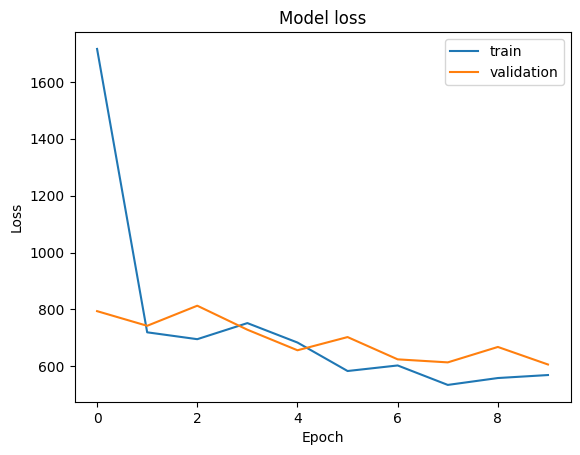

In [69]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [70]:
model.save('ANN_grayscale1.h5')

## RGB

In [21]:
path = r"C:\Users\busjo\Documents\JADS\Semester 2\Deep Learning\Project\Part1_Processed_RGB.pkl"
# Open the pickle file in binary mode
with open(path, 'rb') as file:
    # Load the content of the file into a variable
    RGB_data = pickle.load(file)

In [22]:
RGB_data

,Age,Gender,Race,Image
0,16,1,3,"[[[0.36862746, 0.38431373, 0.3882353], [0.3568..."
1,40,1,0,"[[[0.654902, 0.6666667, 0.68235296], [0.654902..."
2,71,1,0,"[[[0.6901961, 0.61960787, 0.5764706], [0.71372..."
3,80,1,0,"[[[0.42745098, 0.5176471, 0.7372549], [0.42745..."
4,21,0,4,"[[[0.03137255, 0.050980393, 0.10980392], [0.02..."
...,...,...,...,...
10130,53,0,0,"[[[0.36078432, 0.41960785, 0.78431374], [0.356..."
10131,36,0,0,"[[[0.69411767, 0.69411767, 0.69411767], [0.690..."
10132,1,0,2,"[[[0.7490196, 0.73333335, 0.7294118], [0.74901..."
10133,3,1,4,"[[[0.42745098, 0.5803922, 0.54901963], [0.4313..."


In [81]:
sampled_RGB_data = RGB_data.sample(n=1000)

In [82]:
list(RGB_data['Image'])[0].shape

(256, 256, 3)

In [83]:
X = np.stack(sampled_RGB_data['Image'].values)  # Converts a column of arrays into a single numpy array
X = X = X.reshape(X.shape[0], -1)
y = sampled_RGB_data['Age'].values
#X = sampled_RGB_data['Image'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_train.shape

(800, 196608)

In [85]:
model2 = Sequential([Dense(2048, activation = 'relu', input_shape=(196608,)),
Dense(512, activation = 'relu' ),
Dense(128, activation = 'relu' ),
Dense(32, activation = 'relu' ),
Dense(1)])

In [86]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [78]:
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - loss: 193585.0156 - mean_absolute_error: 248.6780 - val_loss: 1300.2450 - val_mean_absolute_error: 26.8705
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 4621.3804 - mean_absolute_error: 53.8260 - val_loss: 4789.4185 - val_mean_absolute_error: 61.1931
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 4331.2905 - mean_absolute_error: 54.2797 - val_loss: 6585.4526 - val_mean_absolute_error: 75.9963
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 3252.5613 - mean_absolute_error: 48.5797 - val_loss: 1195.8525 - val_mean_absolute_error: 25.3576
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 2052.4158 - mean_absolute_error: 35.4878 - val_loss: 984.2689 - val_mean_absolute_error: 27.0529
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 1826.5726 - mean_absolute_error: 34.0368 - val_loss: 4438.8037 - val_mean_absolute_error: 60.8573
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 2500.5757 - mean_absolu

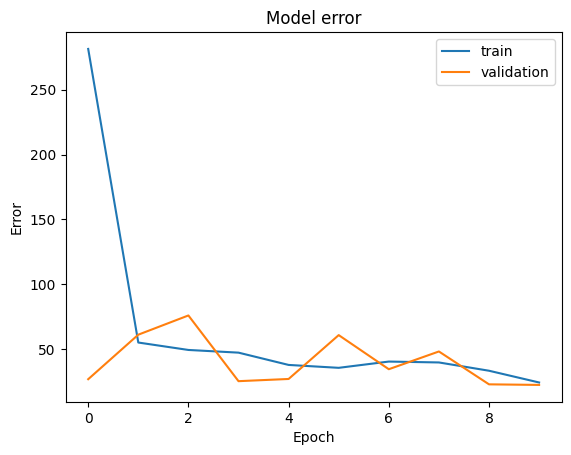

In [79]:
plt.plot(history2.history['mean_absolute_error'], label='train')
plt.plot(history2.history['val_mean_absolute_error'], label='validation')
plt.title('Model error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [80]:
model2.save('ANN_RGB1.h5')